In [1]:
#import required libraries, no books here
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# read the dataset into the notebook
df = pd.read_csv("premier_league_20_teams_stats.csv")
df.head()

,Team,Matches Played,Wins,Draws,Losses,Goals For,Goals Against,Goal Difference,Points,Form (Last 5),Clean Sheets,Both Teams to Score (%),Expected Goals For (xGF),Yellow Cards,Red Cards,Corners per Match,Average Goals per Match
0,Arsenal,10,8,1,1,25,10,15,25,WWDWW,4,70,22.5,15,0,5.5,2.5
1,Manchester City,10,7,2,1,24,8,16,23,WWDLW,5,60,23.1,12,0,6.2,2.4
2,Liverpool,10,6,3,1,20,9,11,21,WDWWW,3,50,20.3,14,1,5.8,2.0
3,Tottenham,10,7,1,2,22,12,10,22,LWWDW,4,60,21.0,11,0,5.9,2.2
4,Aston Villa,10,6,2,2,18,11,7,20,WLWWL,3,60,18.7,10,0,5.1,1.8


In [3]:
# Encoding "Form (Last 5)",why? because i intend to use randomforestclassifier to predict this code, and it doesn't work too well w/ strings
def encode_form(form_string):
    form_encoding = {'W': 3, 'D': 1, 'L': 0}
    return sum(form_encoding[char] for char in form_string)
    

In [4]:
#creating a new feature/column that better fits the randomforestclassifier model
df['Form_Encoded'] = df['Form (Last 5)'].apply(encode_form)

In [5]:
# Dropping original "Form (Last 5)" column and points, because that's what i'm trying to predict. also teams as well because we are using random forest
features_encoded = df.drop(columns=["Team", "Points", "Form (Last 5)"])
target = df["Points"]

In [6]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

In [7]:
# Initializing Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [8]:
# Training the model
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
# Making predictions
y_pred = random_forest_model.predict(X_test)

In [10]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 1.9725000000000001
Root Mean Squared Error: 2.4385600259169347


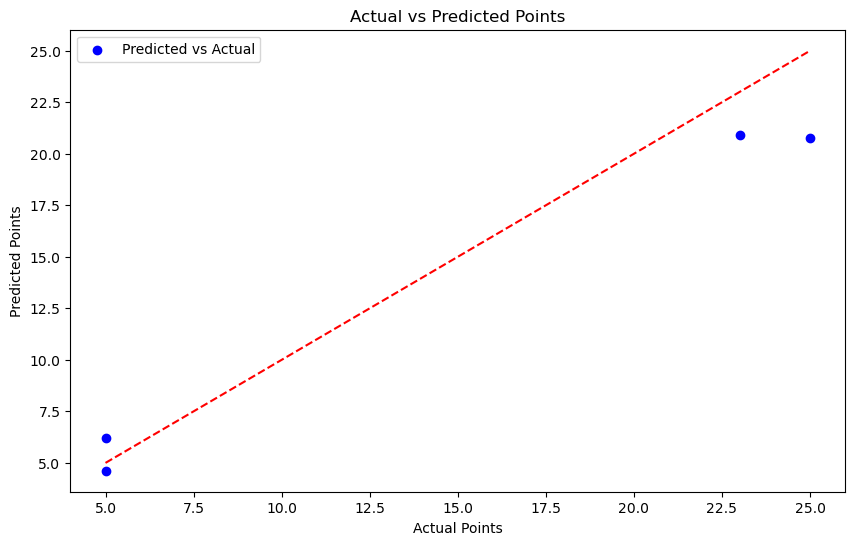

In [11]:
# time to visualize!!
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted vs Actual Points
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points')
plt.legend()
plt.show()

                 Team  Matches Played  Wins  Draws  Losses  Goals For  \
0             Arsenal              10     8      1       1         25   
1     Manchester City              10     7      2       1         24   
2           Liverpool              10     6      3       1         20   
3           Tottenham              10     7      1       2         22   
4         Aston Villa              10     6      2       2         18   
5   Manchester United              10     5      1       4         15   
6             Chelsea              10     4      3       3         14   
7           Newcastle              10     5      1       4         16   
8            Brighton              10     5      2       3         19   
9            West Ham              10     4      3       3         13   
10     Crystal Palace              10     3      2       5         10   
11             Fulham              10     3      2       5         11   
12          Brentford              10     3      3 

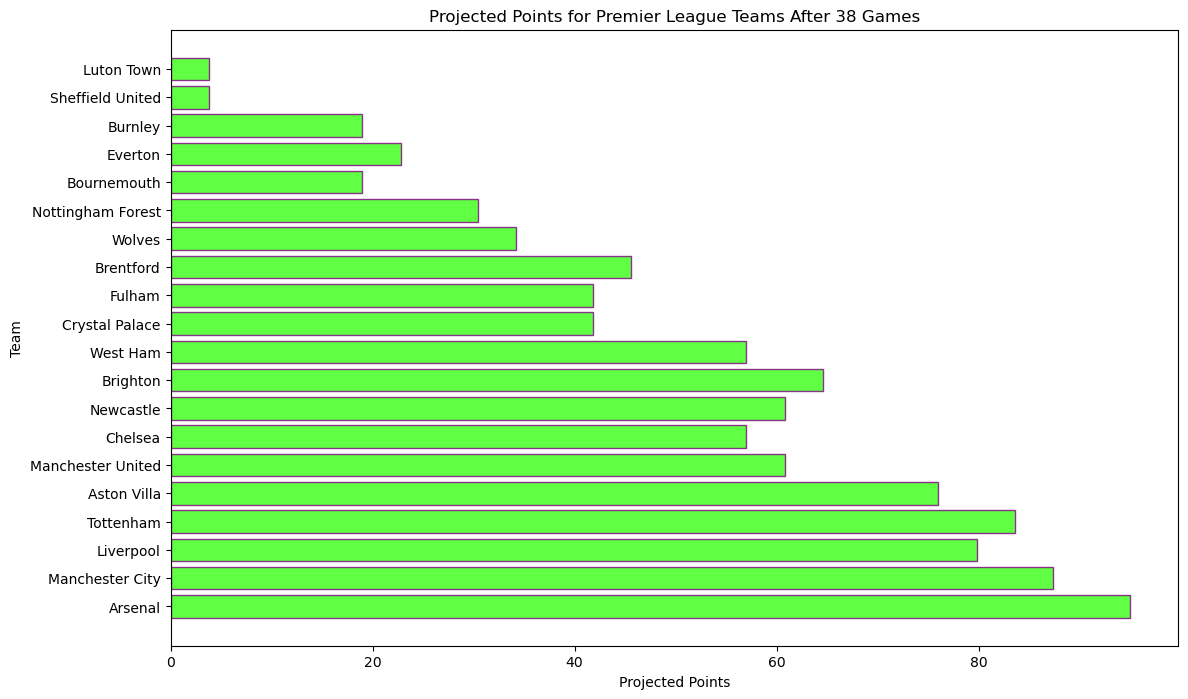

In [12]:
# Calculate Points Per Game (PPG) for each team based on current data
df['PPG'] = df['Points'] / df['Matches Played']

# Projected Points after 38 games
remaining_games = 38 - df['Matches Played']
df['Projected Points'] = df['Points'] + df['PPG'] * remaining_games

# Sort by projected points to see the predicted table at the end of the season
df_sorted = df[['Team', 'Points', 'Projected Points']].sort_values(by='Projected Points', ascending=False)

# Display the table showing current and projected points
print(df)

# Visualizing the projected points
plt.figure(figsize=(13, 8))
plt.barh(df['Team'], df['Projected Points'], color='#39FF14', alpha=0.8, edgecolor='purple')
plt.xlabel('Projected Points')
plt.ylabel('Team')
plt.title('Projected Points for Premier League Teams After 38 Games')
plt.show()


In [13]:
sorted = df['Projected Points']
sorted

0     95.0
1     87.4
2     79.8
3     83.6
4     76.0
5     60.8
6     57.0
7     60.8
8     64.6
9     57.0
10    41.8
11    41.8
12    45.6
13    34.2
14    30.4
15    19.0
16    22.8
17    19.0
18     3.8
19     3.8
Name: Projected Points, dtype: float64

In [14]:
# Sort the DataFrame by 'Projected Points' in descending order
df.sort_values(by='Projected Points', ascending=True)

# Display the sorted DataFrame
print(df[['Team', 'Projected Points']])


                 Team  Projected Points
0             Arsenal              95.0
1     Manchester City              87.4
2           Liverpool              79.8
3           Tottenham              83.6
4         Aston Villa              76.0
5   Manchester United              60.8
6             Chelsea              57.0
7           Newcastle              60.8
8            Brighton              64.6
9            West Ham              57.0
10     Crystal Palace              41.8
11             Fulham              41.8
12          Brentford              45.6
13             Wolves              34.2
14  Nottingham Forest              30.4
15        Bournemouth              19.0
16            Everton              22.8
17            Burnley              19.0
18   Sheffield United               3.8
19         Luton Town               3.8


In [15]:
df_projection = df[['Team', 'Projected Points']].sort_values(by='Projected Points', ascending=False)
df_projection

,Team,Projected Points
0,Arsenal,95.0
1,Manchester City,87.4
3,Tottenham,83.6
2,Liverpool,79.8
4,Aston Villa,76.0
8,Brighton,64.6
5,Manchester United,60.8
7,Newcastle,60.8
6,Chelsea,57.0
9,West Ham,57.0


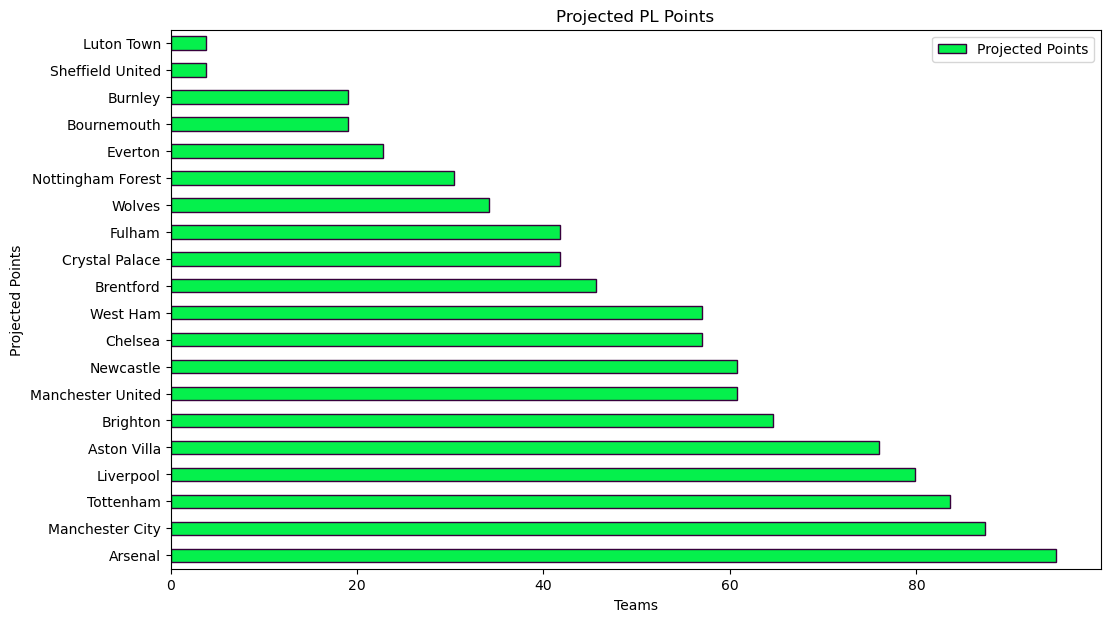

In [16]:
df_projection.plot(kind='barh', x='Team', y='Projected Points', figsize=(12,7), color='#05F04C', edgecolor='#37003C')
plt.xlabel('Teams')
plt.ylabel('Projected Points')
plt.title('Projected PL Points')
plt.show()